<img style="float: left;" src="images/header3_R.png">


Visualisation de données et algorithmes de classification
=============  

### Auteur: 
- Marie-Joël Dandoga, VP-Education 2019-2020

### Table des matières

- [Section 1. Visualisation de données avec ggplot2](#Visualisation)
- [Section 2. Algorithmes de classification](#Classification)


<a id="Visualisation"></a>
# Section 1: Visualisation de données avec ggplot2

ggplot2 est une extension du tidyverse qui permet de générer des graphiques avec une syntaxe cohérente et puissante. Elle nécessite l’apprentissage d’un mini-langage supplémentaire, mais permet la construction de graphiques complexes de manière efficace.
Une des particularités de ggplot2 est qu’elle part du principe que les données relatives à un graphique sont stockées dans un tableau de données (data frame, tibble ou autre).

## 1.1 Préparation
ggplot2 fait partie du coeur du tidyverse, elle est donc chargée automatiquement avec :

In [1]:
# install.packages("ggplot2")
library(ggplot2)

Le jeu de données utilisé est relatif au recensement de la population de 2012  (résultats partiels concernant les communes de plus de 2000 habitants de France métropolitaine). Il est inclus dans l'extension **questionr** et on extrait uniquement les données de 5 départements. 

In [2]:
# install.packages("questionr")
library(questionr)
data(rp2012)

rp <- rp2012[rp2012$departement == c("Oise", "Rhône", "Hauts-de-Seine", "Gironde", "Bouches-du-Rhône"),]

## 1.2 Initialisation
- Un graphique ggplot2 s’initialise à l’aide de la fonction **ggplot()**. 
- Les données représentées graphiquement sont toujours issues d’un tableau de données qu’on passe en argument data à la fonction. 
- Il faut ajouter des éléments de représentation graphique. Ces éléments sont appelés des **geom**, et on les ajoute à l’objet graphique de base avec l’opérateur **+**. Un des **geom** les plus simples est **geom_histogram**.
- La variable à représenter sur l'axe des x est renseigné via la fonction **aes()** 
Par exemple si on souhaite représenter la distribution des communes du jeu de données selon le pourcentage de cadres dans leur population active (variable cadres), on pourra faire :

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


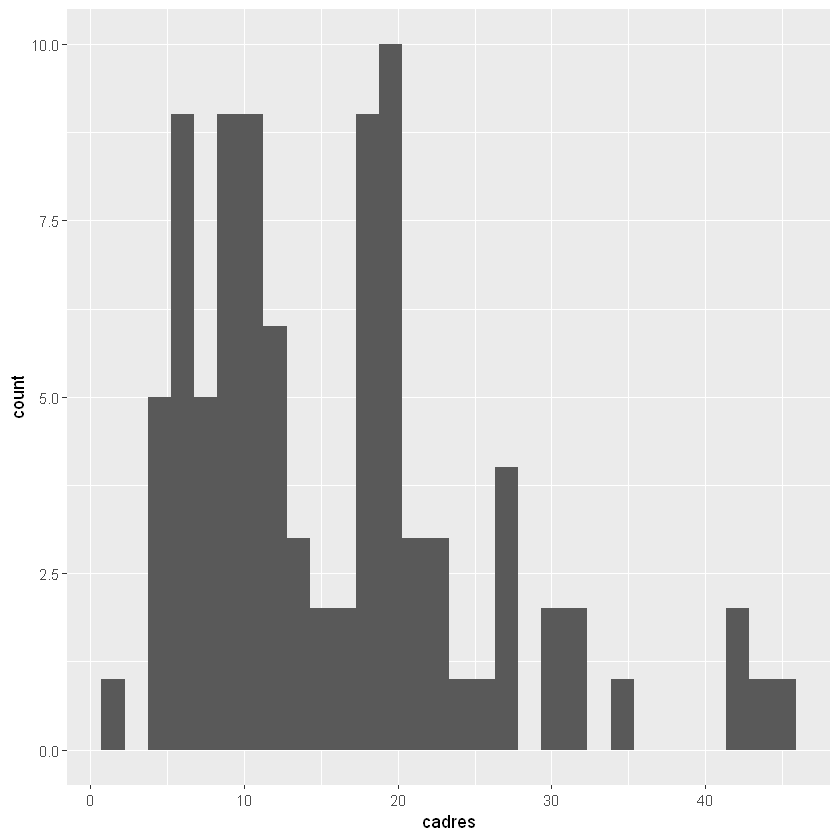

In [3]:
ggplot(rp) + geom_histogram(aes(x = cadres))

Quand on spécifie une variable, inutile d’indiquer le nom du tableau de données sous la forme rp$cadre, car ggplot2 recherche automatiquement la variable dans le tableau de données indiqué avec le paramètre data. On peut donc se contenter de cadre.

Si on veut représenter un nuage de points, on peut le faire en ajoutant un **geom_point**. On doit alors indiquer à la fois la position en x (la variable sur l’axe horizontal) et en y (la variable sur l’axe vertical) de ces points, il faut donc passer ces deux arguments à aes(). Mais aussi des arguments pour la couleur, la taille et la transparence des points peuvent être ajoutés au geom comme suit:

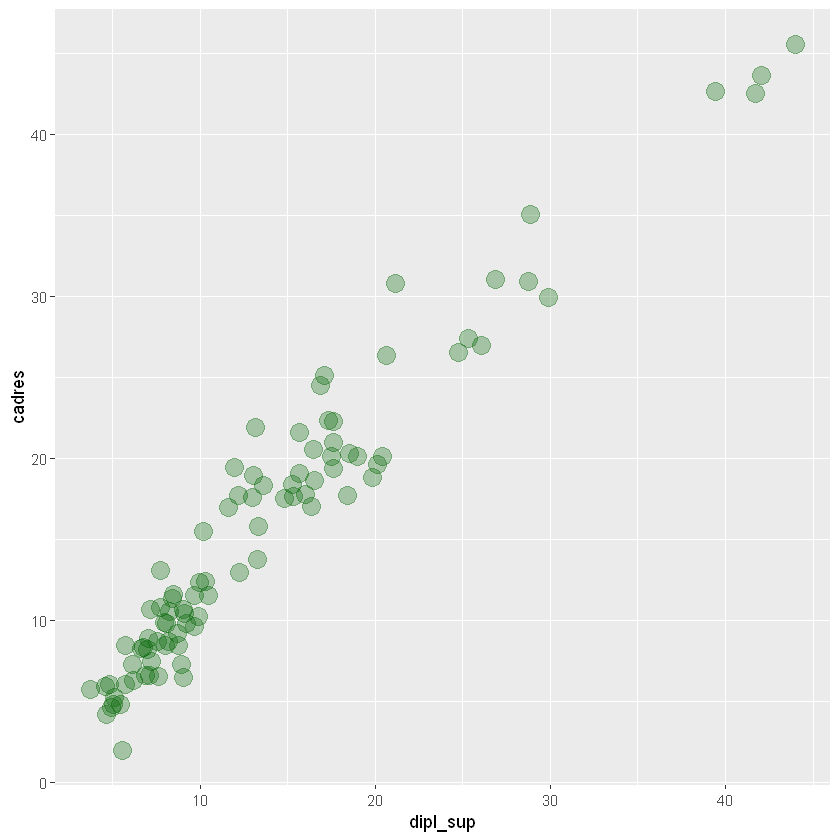

In [4]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres), 
             color = "darkgreen", size = 5, alpha = 0.3)

## 1.3 Exemples de geom
Il existe un grand nombre de geom, décrits en détail dans la documentation officielle. Outre les geom_histogram et geom_point que l’on vient de voir, on pourra noter les geom suivants:

### 1.3.1 geom_boxplot
geom_boxplot permet de représenter des boîtes à moustaches. On lui passe en y la variable numérique dont on veut étudier la répartition, et en x la variable qualitative contenant les classes qu’on souhaite comparer. Ainsi, si on veut comparer la répartition du pourcentage de maisons en fonction du département de la commune, on pourra faire :

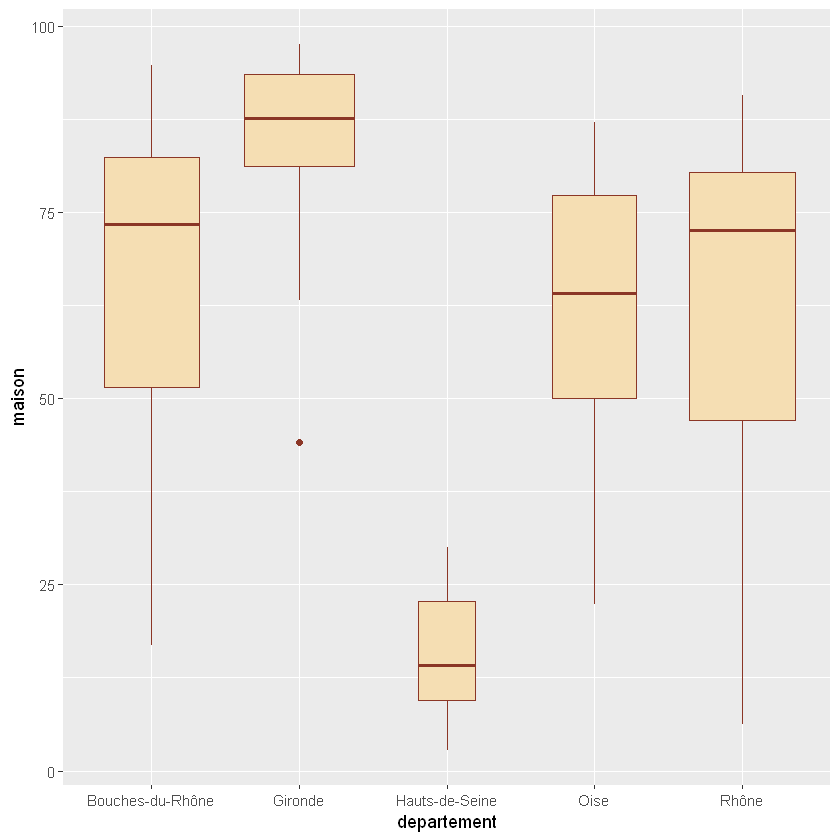

In [5]:
ggplot(rp) + 
  geom_boxplot(aes(x = departement, y = maison), varwidth = TRUE, fill = "wheat", color = "tomato4")

Un autre argument utile, varwidth, permet de faire varier la largeur des boîtes en fonction des effectifs de la classe (donc, ici, en fonction du nombre de communes de chaque département).

### 1.3.2 geom_bar
geom_bar permet de produire un graphique en bâtons (barplot). On lui passe en x la variable qualitative dont on souhaite représenter l’effectif de chaque modalité

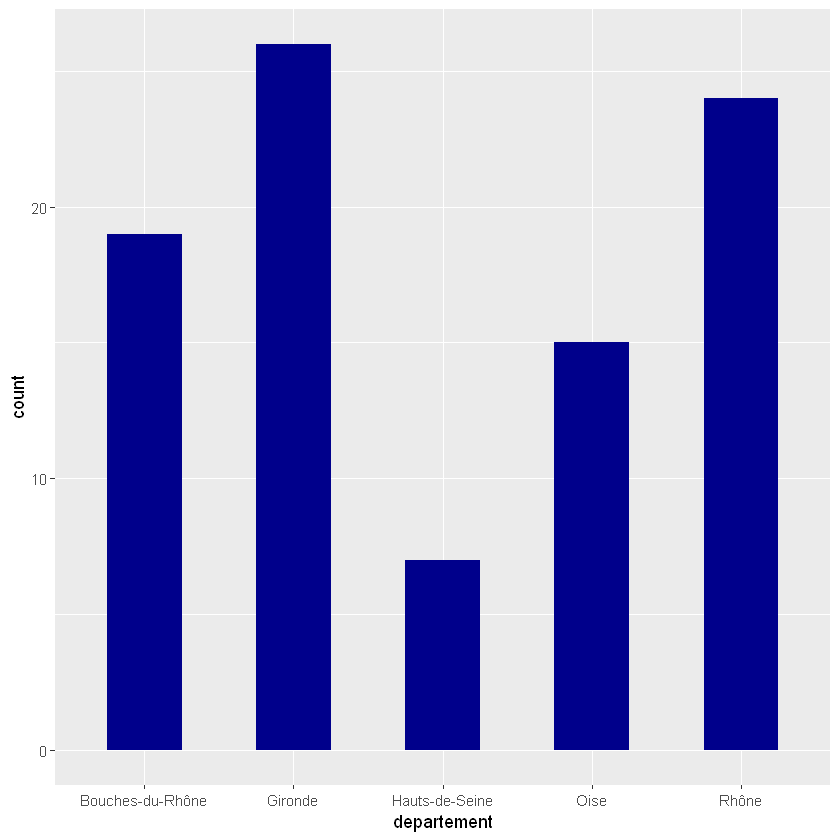

In [6]:
ggplot(rp) + geom_bar(aes(x = departement), fill = "darkblue", width = .5)

### 1.3.3 geom_text & geom_label

geom_text et geom_label permettent d’afficher des étiquettes de texte. On doit lui passer x et y pour la position des étiquettes, et label pour leur texte.

Par exemple, si on souhaite représenter le nuage croissant représentant la part des diplômés du supérieur et la part de cadres, mais en affichant le nom de la commune (variable commune) plutôt qu’un simple point, on peut faire :

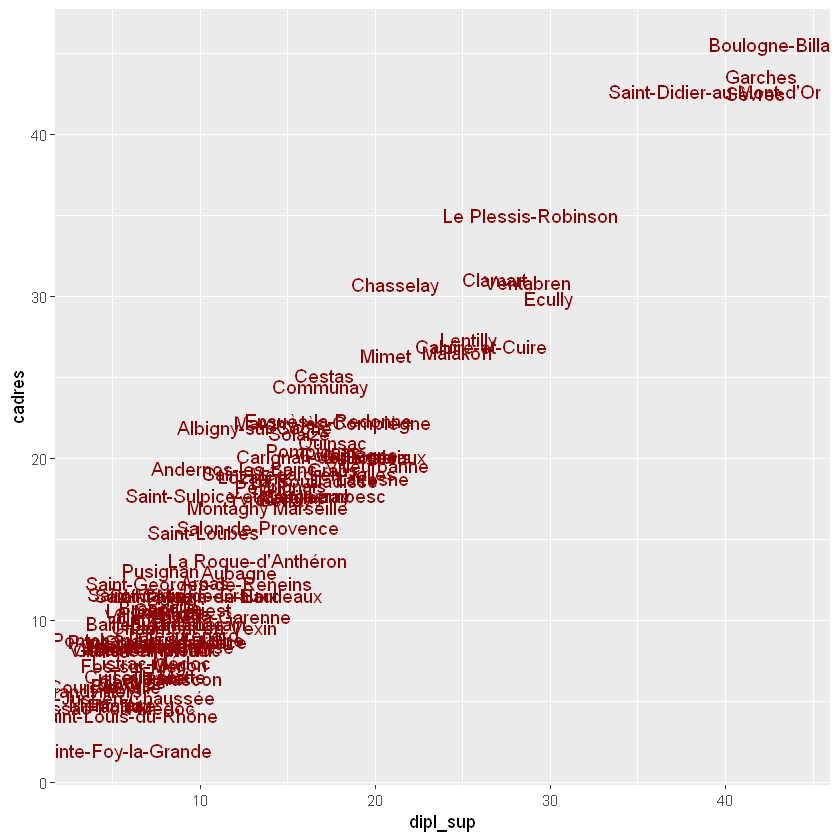

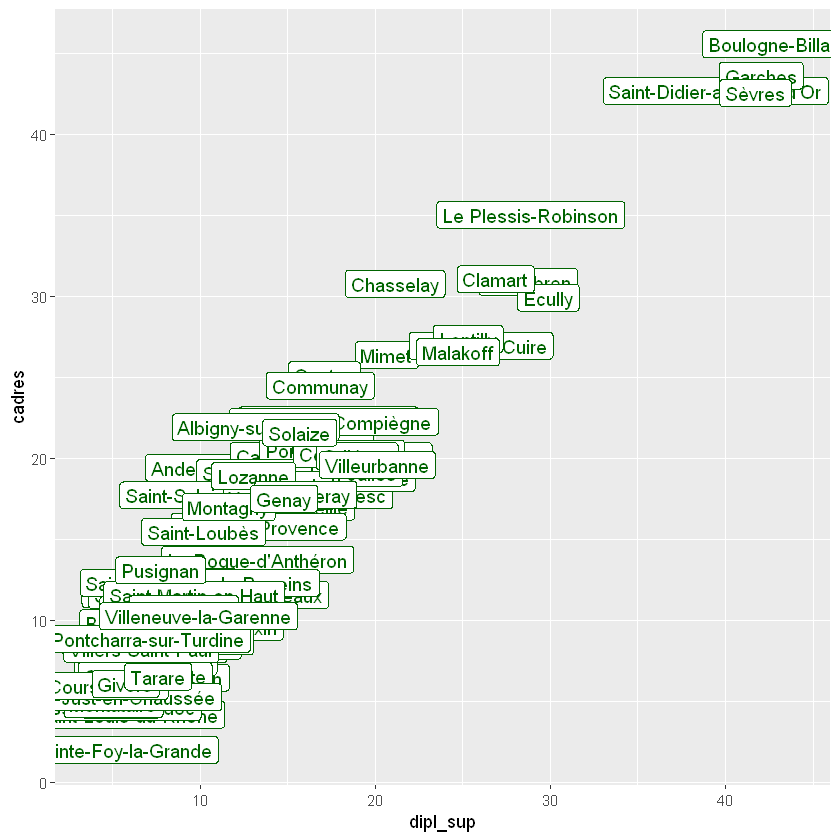

In [7]:
ggplot(rp) + 
  geom_text(aes(x = dipl_sup, y = cadres, label = commune), 
            color = "darkred", size = 4)
ggplot(rp) + 
  geom_label(aes(x = dipl_sup, y = cadres, label = commune), 
            color = "darkgreen", size = 4)

### 1.3.4 geom_density
geom_density permet d’afficher l’estimation de densité d’une variable numérique. Son usage est similaire à celui de geom_histogram.

Ainsi, si on veut afficher la densité de la répartition de la part des cadres dans les communes de notre jeu de données:

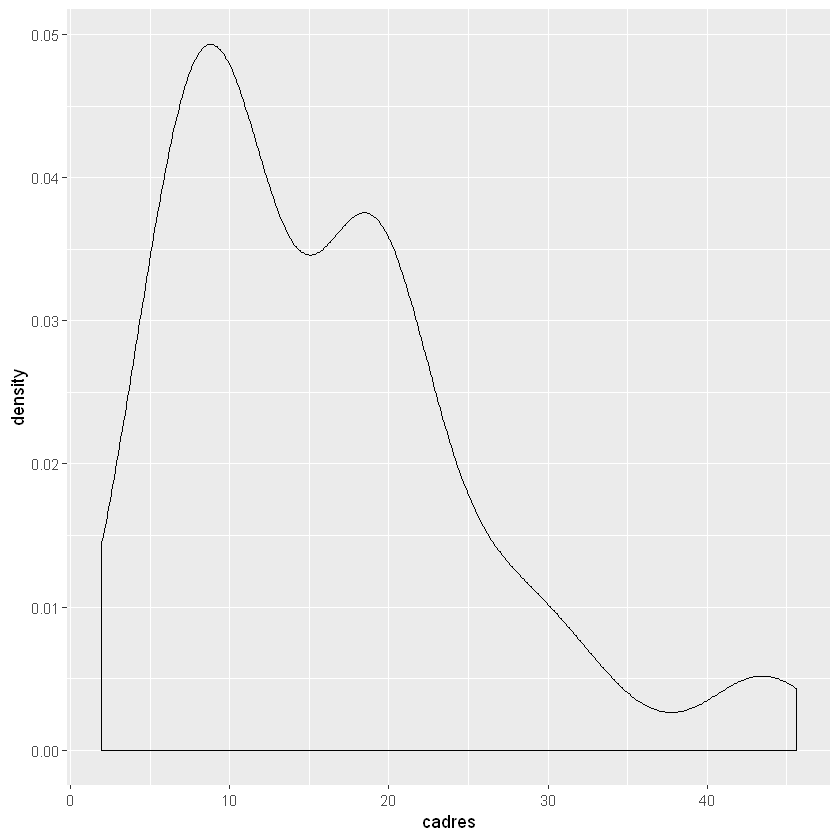

In [8]:
ggplot(rp) + geom_density(aes(x = cadres))

### 1.3.5 geom_line
geom_line trace des lignes connectant les différentes observations entre elles. Il est notamment utilisé pour la représentation de séries temporelles. On passe à geom_line deux paramètres : x et y. Les observations sont alors connectées selon l’ordre des valeurs passées en x.

Comme il n’y a pas de données adaptées pour ce type de représentation dans notre jeu de données d’exemple, on va utiliser ici le jeu de données economics inclus dans ggplot2 et représenter l’évolution du taux de chômage aux États-Unis (variable unemploy) dans le temps (variable date)

In [9]:
data("economics")
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


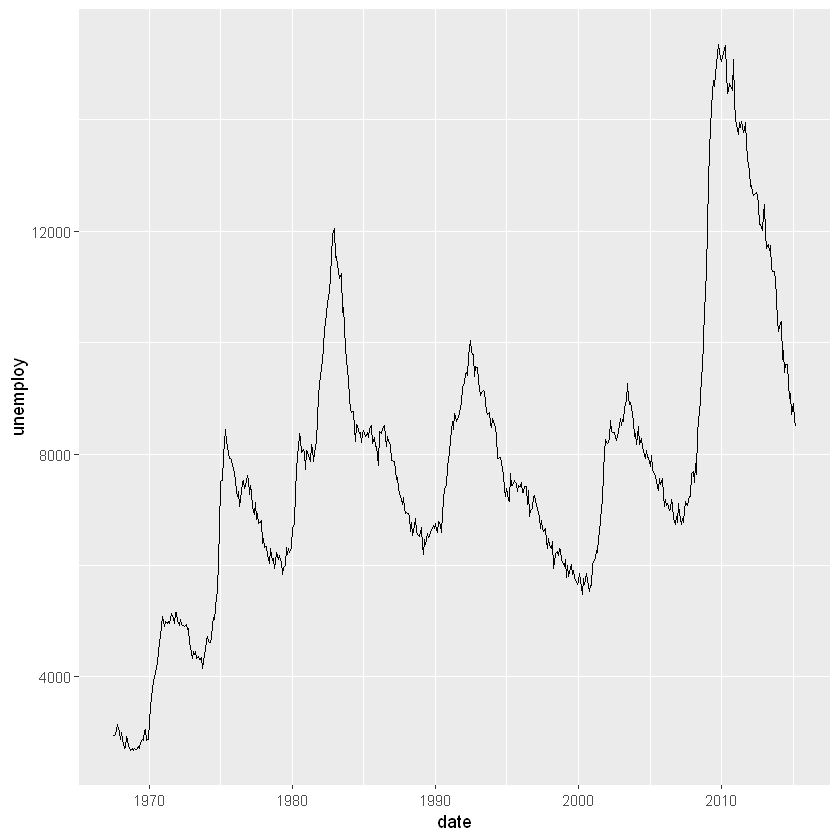

In [10]:
ggplot(economics) + geom_line(aes(x = date, y = unemploy))

## 1.4 Mappages
Un mappage, dans ggplot2, est une mise en relation entre un attribut graphique du geom (position, couleur, taille…) et une variable du tableau de données.

Ces mappages sont passés aux différents geom via la fonction aes() (abbréviation d’aesthetic).
Chaque geom possède sa propre liste de mappages.

On a déjà vu les mappages x et y pour un nuage de points. Ceux-ci signifient que la position d’un point donné horizontalement (x) et verticalement (y) dépend de la valeur des variables passées comme arguments x et y dans aes(). Mais on peut ajouter d’autres mappages.Par exemple:
- color permet de faire varier la couleur des points automatiquement en fonction des valeurs d’une troisième variable. Ainsi, on peut vouloir colorer les points selon le département de la commune correspondante;
- On peut aussi faire varier la taille des points avec size. Ici, la taille dépend de la population totale de la commune;
- On peut même associer la transparence des points à une variable avec alpha 

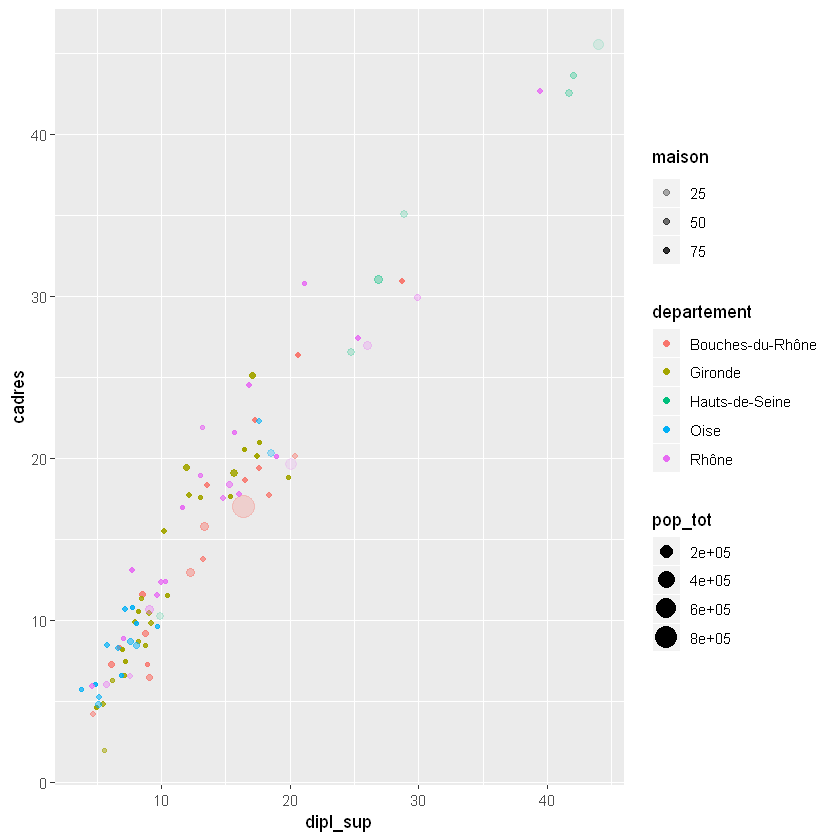

In [11]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, 
                 color = departement, size = pop_tot, alpha = maison))

### 1.4.1 aes() ou pas aes()?
Comme on l’a déjà vu, parfois on souhaite changer un attribut sans le relier à une variable. Par exemple, on veut représenter tous les points en rouge. Dans ce cas on utilise toujours l’attribut color, mais comme il ne s’agit pas d’un mappage, on le définit à l’extérieur de la fonction aes() :

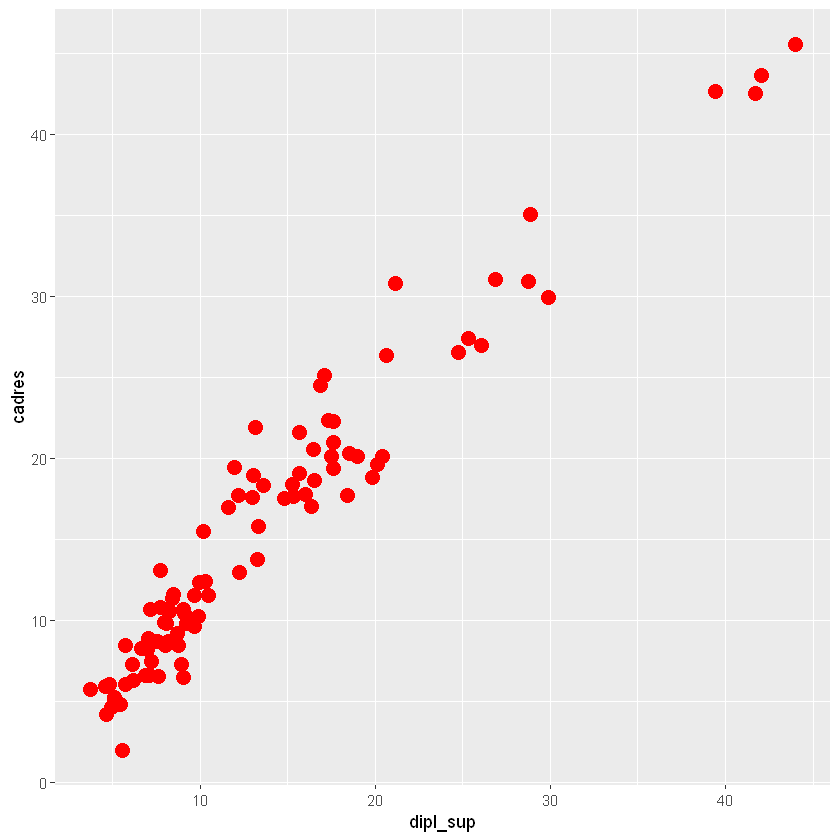

In [12]:
ggplot(rp) + geom_point(aes(x = dipl_sup, y = cadres), size = 4, color = "red")

Par contre, si on veut faire varier la couleur en fonction des valeurs prises par une variable, on réalise un mappage, et on doit donc placer l’attribut color à l’intérieur de aes().

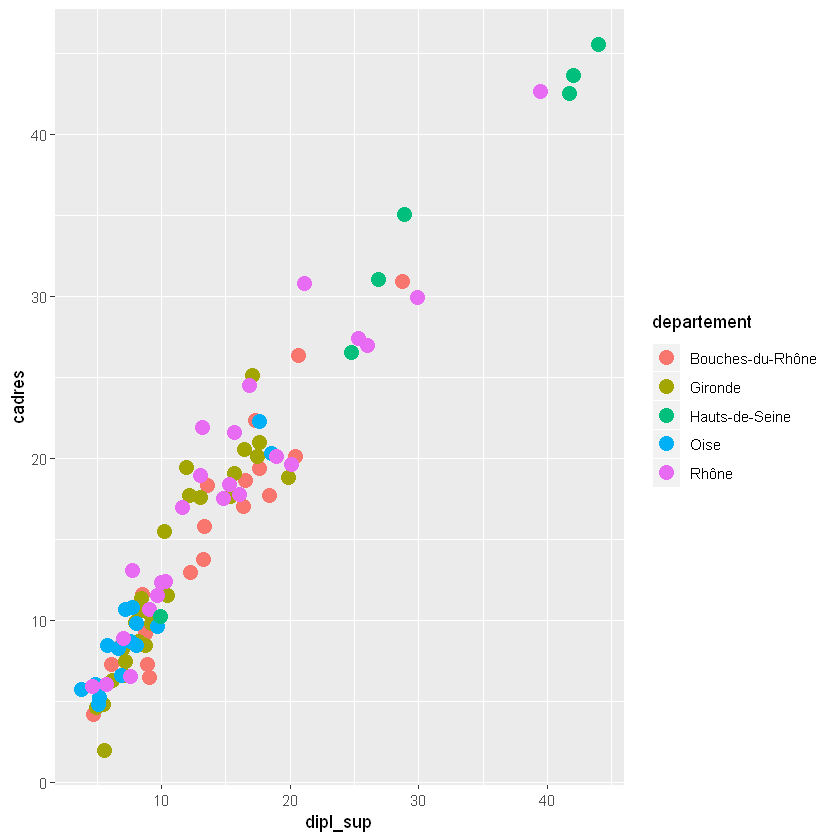

In [13]:
ggplot(rp) + geom_point(aes(x = dipl_sup, y = cadres, color = departement), size = 4)

On peut évidemment mélanger attributs liés à une variable (mappage, donc dans aes()) et attributs constants (donc à l’extérieur). Dans l’exemple suivant, la taille varie en fonction de la variable pop_tot, mais la couleur est constante pour tous les points :

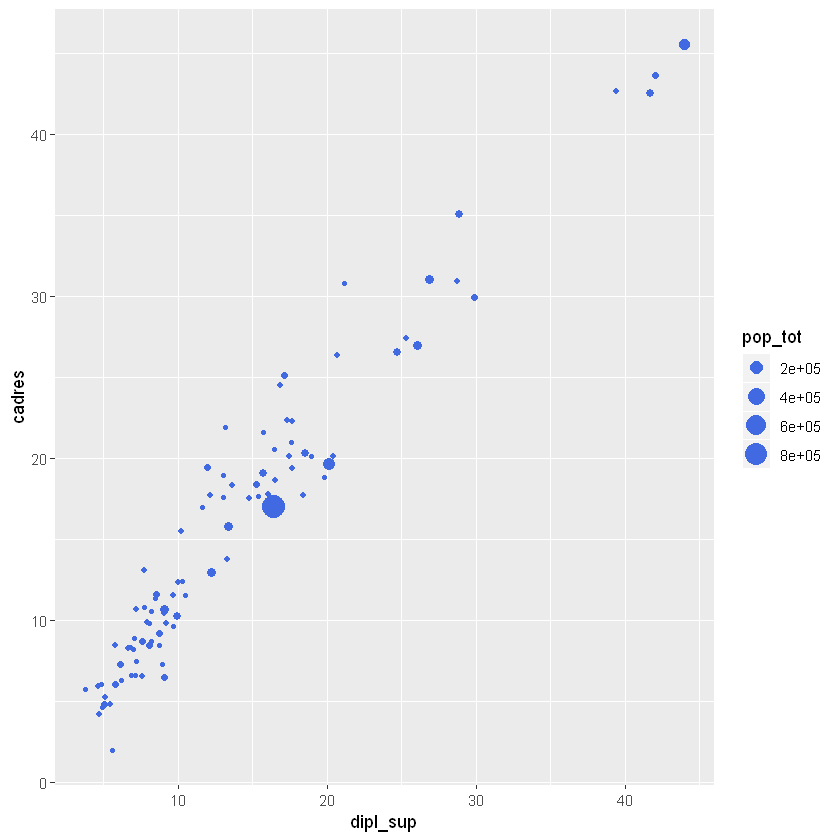

In [14]:
ggplot(rp) + geom_point(aes(x = dipl_sup, y = cadres, size = pop_tot), color = "royalblue")

*__La règle est donc simple mais très importante :__*

Si on établit un lien entre les valeurs d’une variable et un attribut graphique, on définit un mappage, et on le déclare dans aes(). Sinon, on modifie l’attribut de la même manière pour tous les points, et on le définit en-dehors de la fonction aes().

### 1.4.2 geom_bar et position
Un des mappages possibles de geom_bar est l’attribut *fill*, qui permet de tracer des barres de couleur différentes selon les modalités d’une deuxième variable :

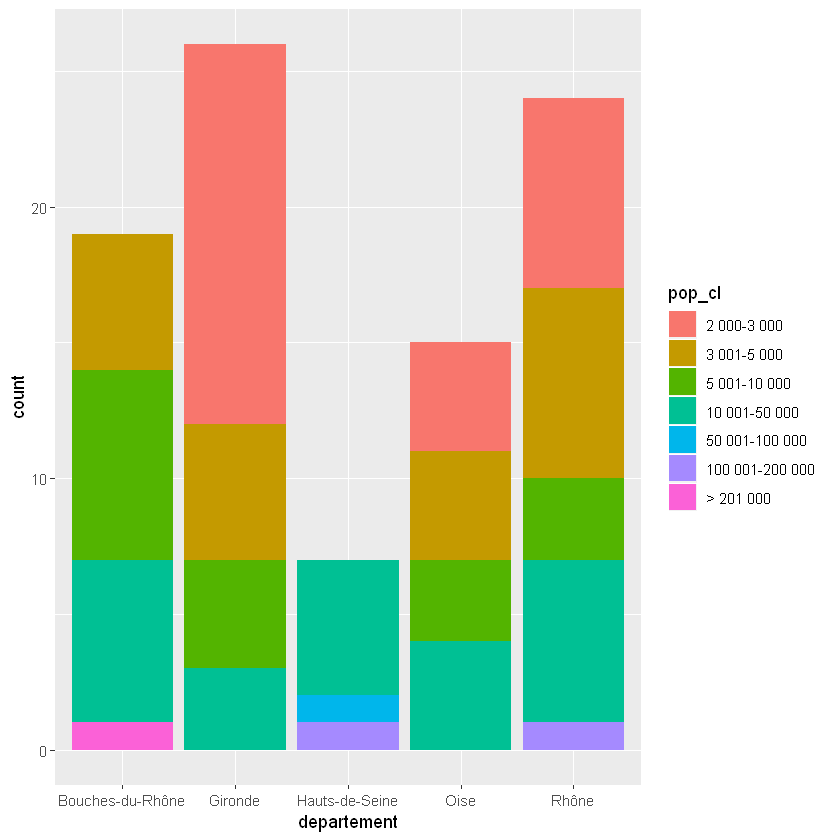

In [15]:
ggplot(rp) + geom_bar(aes(x = departement, fill = pop_cl))

L’attribut position de geom_bar permet d’indiquer comment les différentes barres doivent être positionnées. Par défaut on a position = "stack" et elles sont donc “empilées”. Mais on peut préciser position = "dodge" pour les mettre côte à côte :

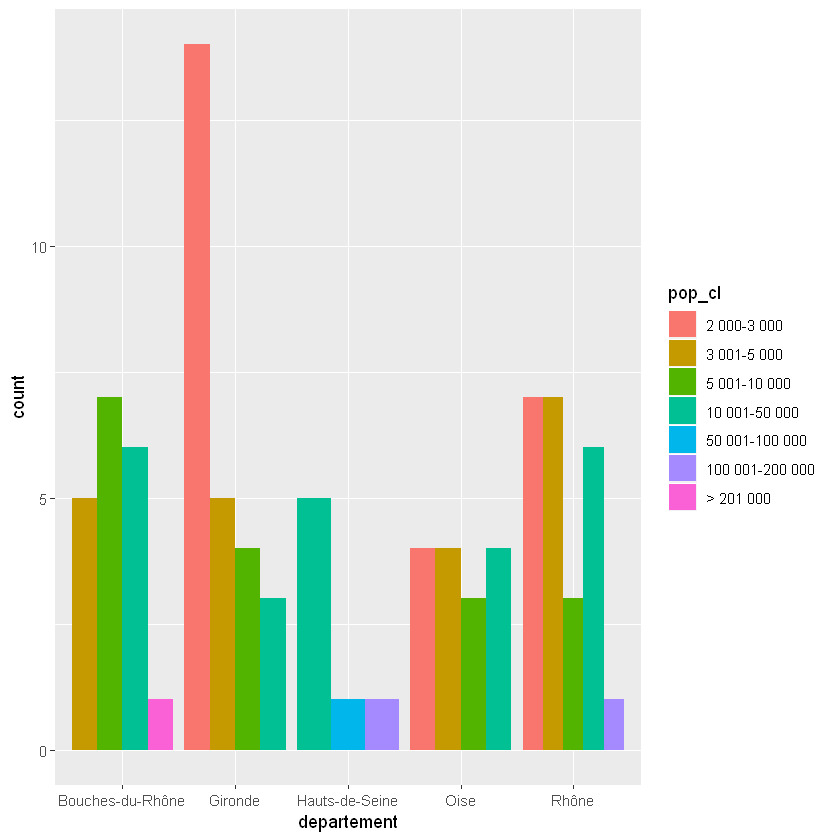

In [16]:
ggplot(rp) + geom_bar(aes(x = departement, fill = pop_cl), position = "dodge")

## 1.5 Représentation de plusieurs geom
On peut représenter plusieurs geom simultanément sur un même graphique, il suffit de les ajouter à tour de rôle avec l’opérateur +.

Par exemple, on peut superposer la position des points au-dessus d’un boxplot en les dispersant verticalement. On va pour cela ajouter un **geom_jitter** après avoir ajouté notre **geom_boxplot** :

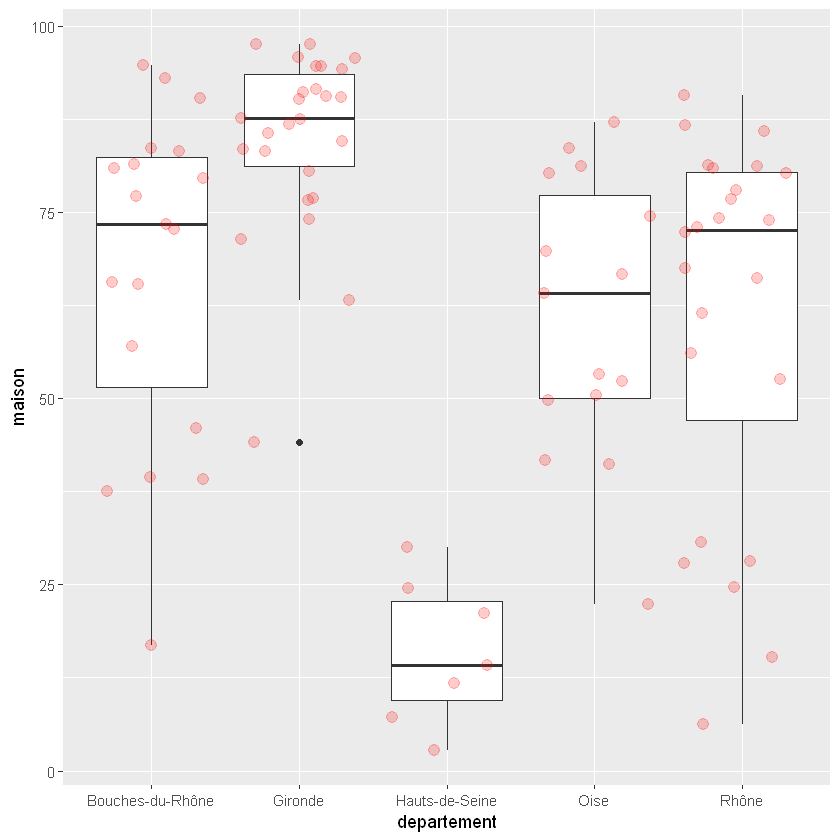

In [17]:
ggplot(rp) +
  geom_boxplot(aes(x = departement, y = maison)) + 
  geom_jitter(aes(x = departement, y = maison), col = "red", size = 3, alpha = 0.2)

Pour simplifier un peu le code, plutôt que de déclarer les mappages dans chaque geom, on peut les déclarer dans l’appel à ggplot(). Ils seront automatiquement “hérités” par les geom ajoutés (sauf s’ils redéfinissent les mêmes mappages).

En plus d'illustrer celà, l'exemple qui suit montre comment ajouter à un nuage de point une ligne de régression linéaire à l'aide de **geom_smooth**

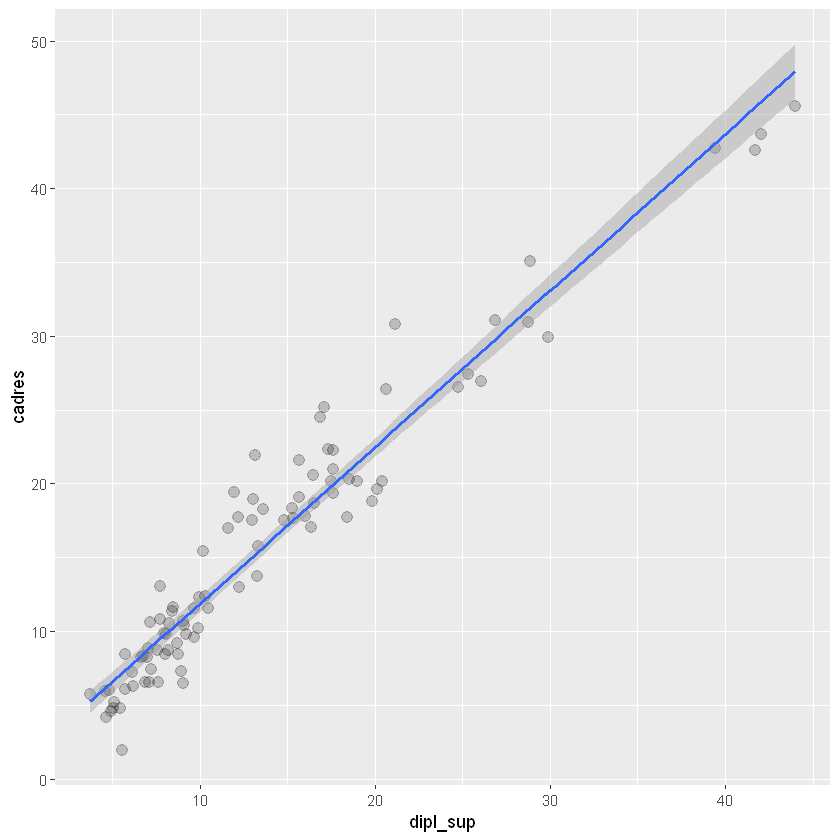

In [18]:
ggplot(rp, aes(x = dipl_sup, y = cadres)) + 
  geom_point(alpha = 0.2, size = 3) + 
  geom_smooth(method = "lm")

## 1.6 Faceting
Le faceting permet d’effectuer plusieurs fois le même graphique selon les valeurs d’une ou plusieurs variables qualitatives.

On peut vouloir comparer une répartition sous forme d'histogramme de la part des cadres selon le département, et donc faire un histogramme pour chacun de ces départements. C’est ce que permet la fonction **facet_grid**.

Elle prend en paramètre une formule de la forme ~variable, où variable est le nom de la variable en fonction de laquelle on souhaite faire les différents graphiques. Les graphiques sont disposés selon une grille. La formule est alors de la forme **variable en ligne ~ variable en colonne**. Si on n’a pas de variable dans l’une des deux dimensions, on met un point (.) 

Un des intérêts du faceting dans ggplot2 est que tous les graphiques générés ont les mêmes échelles, ce qui permet une comparaison directe.

Enfin, notons qu’on peut même faire du faceting sur plusieurs variables à la fois. On peut par exemple faire des histogrammes de la répartition de la part des cadres pour chaque croisement des variables departement et pop_cl 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


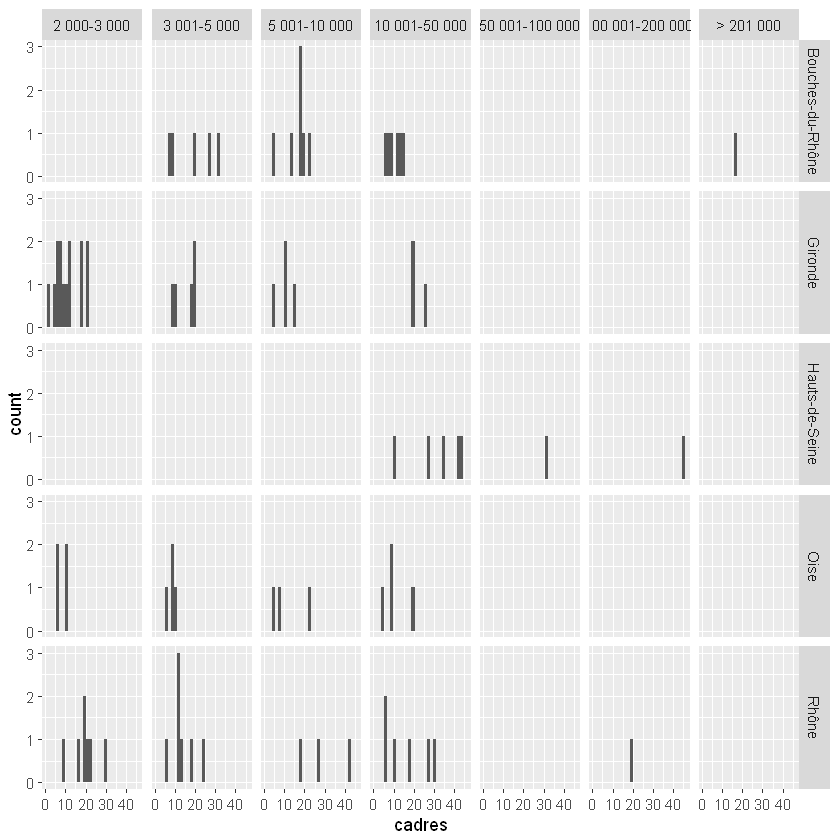

In [19]:
ggplot(data = rp) + 
  geom_histogram(aes(x = cadres)) + 
  facet_grid(departement~pop_cl)

L’histogramme en haut à gauche représente la répartition du pourcentage de cadres parmi les communes de 2000 à 3000 habitants dans les Bouches-du-Rhône, etc.

## 1.7 Scaling
Les scales permettent, entre autre, de modifier les palettes de couleur utilisées pour le dessin (color) ou le remplissage (fill) des éléments graphiques. Dans ce qui suit, pour chaque fonction scale_color présentée il existe une fonction scale_fill équivalente et avec en général les mêmes arguments.

### 1.7.1 Variables quantitatives
Le graphique suivant colore les points selon la valeur d’une variable numérique quantitative (ici la part de chômeurs) 

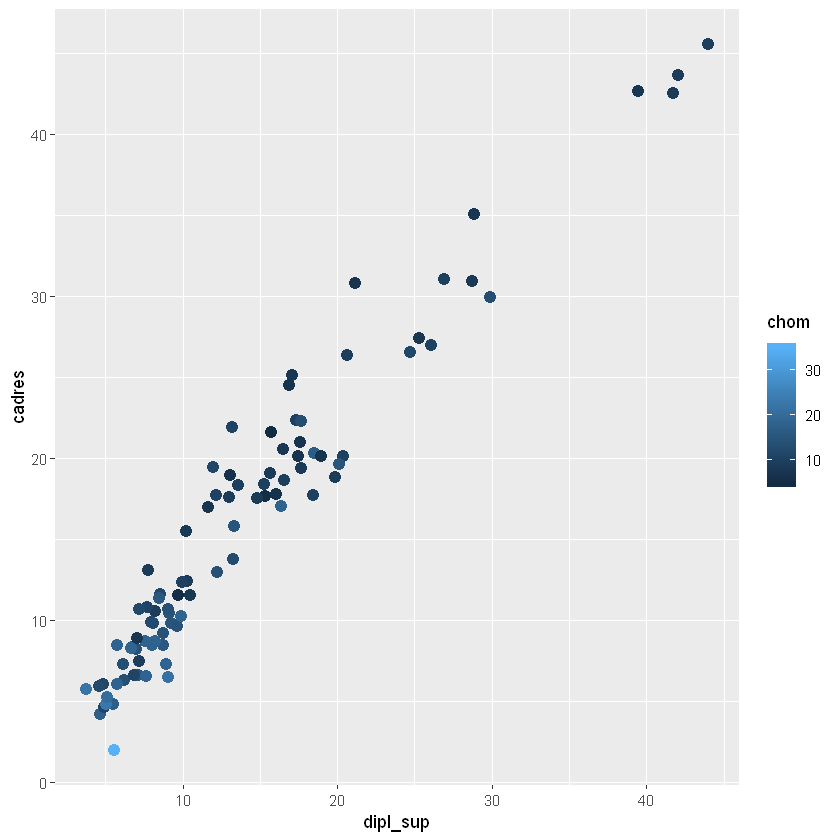

In [20]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, color = chom), size = 3)

On peut modifier les couleurs utilisées avec les arguments low et high de la fonction scale_color_gradient. Ici on souhaite que la valeur la plus faible soit blanche, et la plus élevée rouge :

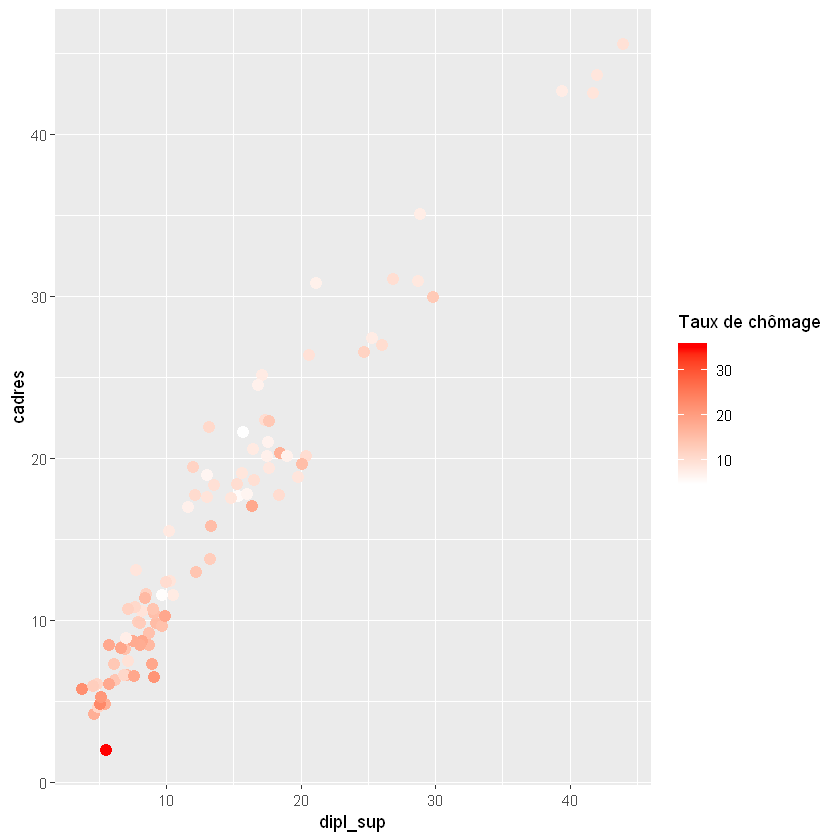

In [21]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, color = chom), size = 3) + 
  scale_color_gradient("Taux de chômage", low = "white", high = "red")

On peut aussi utiliser des palettes prédéfinies. L’une des plus populaires est la palette viridis, accessible depuis l’extension du même nom. On l’ajoute en utilisant scale_color_viridis 

Loading required package: viridisLite


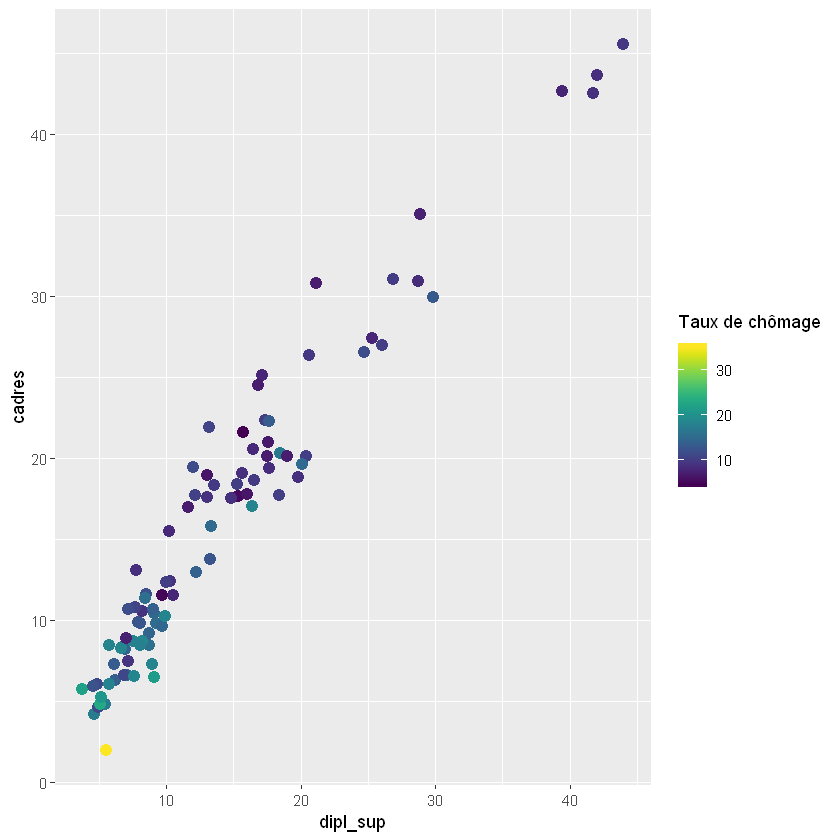

In [22]:
# install.packages("viridis")
library(viridis)
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, color = chom), size = 3) + 
  scale_color_viridis("Taux de chômage")

L’extension viridis propose également trois autres palettes, magma, inferno et plasma, accessibles via l’argument option :

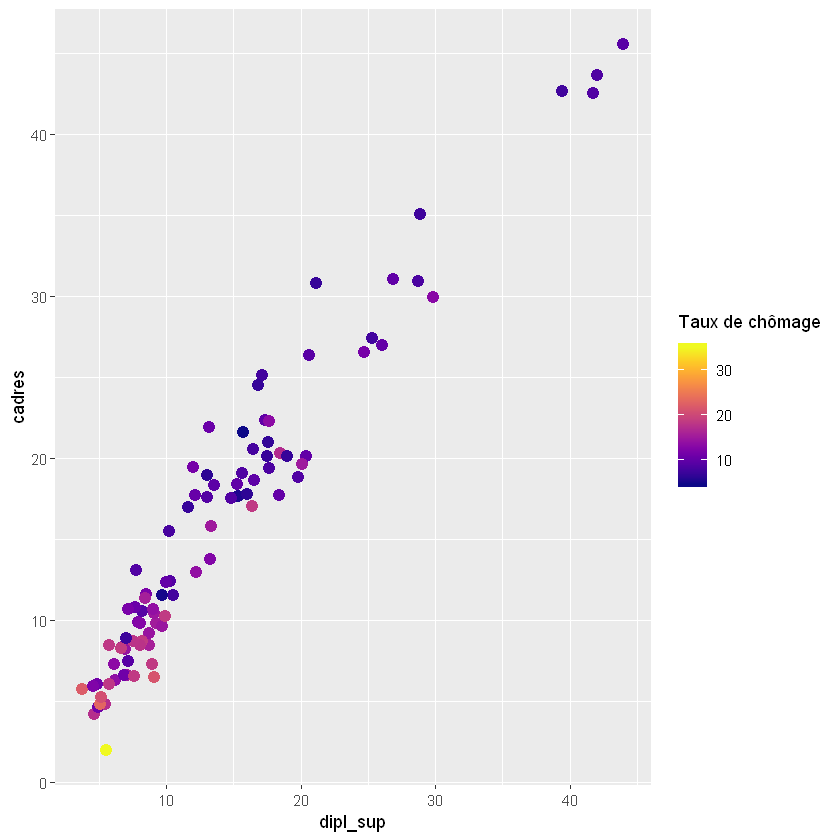

In [23]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, color = chom), size = 3) + 
  scale_color_viridis("Taux de chômage", option = "plasma")

### 1.7.2 Variables qualitatives
Si on a fait un mappage avec une variable discrète (qualitative), comme ici avec le département, on peut modifier la palette manuellement avec **scale_color_manual** et son **argument values**

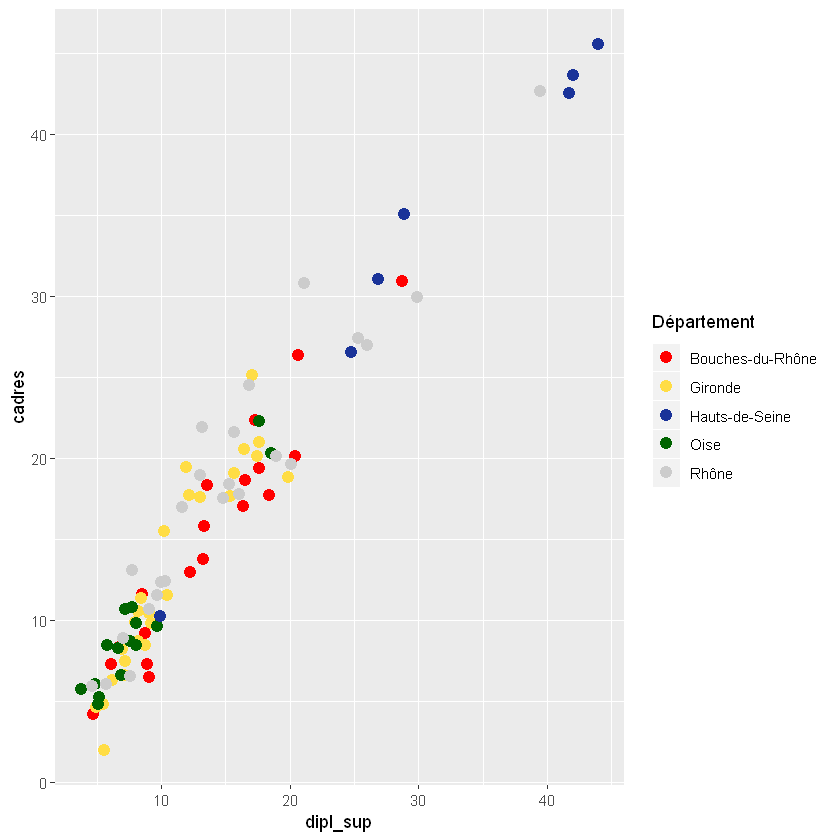

In [24]:
ggplot(rp) + 
  geom_point(aes(x = dipl_sup, y = cadres, color = departement), size = 3) +
  scale_color_manual("Département", 
                     values = c("red", "#FFDD45", rgb(0.1,0.2,0.6), "darkgreen", "grey80"))

L’exemple précédent montre plusieurs manières de définir manuellement des couleurs dans R :

- Par code hexadécimal : “#FFDD45”
- En utilisant la fonction rgb et en spécifiant les composantes rouge, vert, bleu par des nombres entre 0 et 1 (et optionnellement une quatrième composante d’opacité, toujours entre 0 et 1) : rgb(0.1,0.2,0.6)
- En donnant un nom de couleur : “red”, “darkgreen”
La liste complète des noms de couleurs connus par R peut être obtenu avec la fonction colors(). Vous pouvez aussi retrouver en ligne la [liste des couleurs](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf) et leur nom.

## 1.8 Exercice 1
Créez un objet **rp69** comprenant uniquement les communes du Rhône et de la Loire.

1. Faites un nuage de points croisant le pourcentage de sans diplôme et le pourcentage d’ouvriers. Faites varier la couleur selon le département (departement), la taille des points selon la population totale de la commune (pop_tot) et rendez les points transparents en plaçant leur opacité à 0.5.

2. Représenter la répartition du pourcentage de propriétaires (variable proprio) selon la taille de la commune en classes (variable pop_cl) sous forme de boîtes à moustache. Faire varier la couleur de remplissage (attribut fill) selon le département.

3. Faites le nuage de points du pourcentage de cadres (cadres) par le pourcentage de diplômés du supérieur (dipl_sup). Représentez ce nuage par deux graphiques différents selon le département en utilisant facet_grid. Sur le même graphique, faire varier la taille des points selon la population totale de la communes (variable pop_tot) et rendre les points transparents.

<a id="Classification"></a>
# Section 2: Algorithmes de classification
## 2.1 Régression logistique
La régression logistique est un algorithme de classification qui est utilisé pour faire de l'inférence et prédire une variable réponse binaire (1/0, oui/non, vrai/faux) à partir de variables explicatives.
Si on note $$P = P(Y=1)$$ on définit le logit de Y comme étant $$\log(\frac{P}{1 - P})$$ et c'est cette fonction qu'on veut modéliser par une combinaison linéaire des variables explicatives $$\ln(\frac{P}{1 - P}) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p $$ ou encore $$\frac{P}{1 - P} = \exp{(\beta_0 + \beta_1X_1 + ... + \beta_pX_p)} $$ Le rapport de probabilité est appelé **rapport de côte** et c'est lui qu'on voudra interpréter après l'ajustement du modèle.

Le jeu de données qu'on se propose d'utiliser ici fait référence aux informations sur les utilisateurs d'un réseau social, et la façon dont ils ont réagit face à une campagne marketing pour un tout nouveau SUV (achat oui ou non).

### 2.1.1 Importation et pré-traitement des données

In [25]:
dataset = read.csv('Social_Network_Ads.csv')
head(dataset)
# On va uniquement porter attention à l'âge et au salaire
dataset = dataset[,3:5]

# Encoder la variable réponse comme facteur
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

#Séparation en ensemble d'entrainement et de test
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
# Pour la classification c'est mieux d'avoir des variables centrée-réduites
# Surtout quand il y a une grande différence d'échelle entre les variables explicatives
training_set[,-3] = scale(training_set[,-3])
test_set[,-3] = scale(test_set[,-3])

head(training_set)
head(test_set)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


### 2.1.2 Ajustement du modèle de régression logistique à l'ensemble d'entraînement


In [26]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set)
summary(classifier)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0753  -0.5235  -0.1161   0.3224   2.3977  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1923     0.2018  -5.908 3.47e-09 ***
Age               2.6324     0.3461   7.606 2.83e-14 ***
EstimatedSalary   1.3947     0.2326   5.996 2.03e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.78  on 297  degrees of freedom
AIC: 205.78

Number of Fisher Scoring iterations: 6


### 2.1.3 Interprétation des coefficients
- Lorsque l'âge augmente d'une unité, la côte d'acheter le SUV augmente de $\exp(2.6324) = 13.90711$ en moyenne, lorsque le salaire et le sexe restent fixes.
- Lorsque le salaire augmente d'une unité, la côte d'acheter le SUV augmente de $\exp(1.3947) = 4.033764$ en moyenne, lorsque l'âge et le sexe restent fixes.

### 2.1.4 Prédiction et analyse de performence
On utilise la fonction **predict** pour prédire les probabilités sur l'ensemble de test et une règle de décision (ici 0.5) pour classer les clients dans l'une ou l'autre des catégories de la variable réponse.
Plusieurs métriques de performence peuvent être calculées sur la base de la matrice de confusion qui présente les distortions entre prédictions et valeurs réelles.

In [27]:
# Prédiction
prob_pred = predict(classifier, type = 'response', newdata = test_set)
head(prob_pred)
y_pred = ifelse(prob_pred > 0.5, 1, 0)
head(y_pred)
# Matrice de confusion
cm = table(y_pred, test_set[, 3], dnn=c("Prediction","Observation"))
cm
# Taux de mauvaise classifiication
tmc = 100*(cm[1,2]+cm[2,1])/nrow(test_set)
tmc

2           4           5           9          12          18 
0.016239538 0.011714838 0.003784646 0.002452746 0.007333944 0.206157658

2  4  5  9 12 18 
 0  0  0  0  0  0

          Observation
Prediction  0  1
         0 57 10
         1  7 26

[1] 17

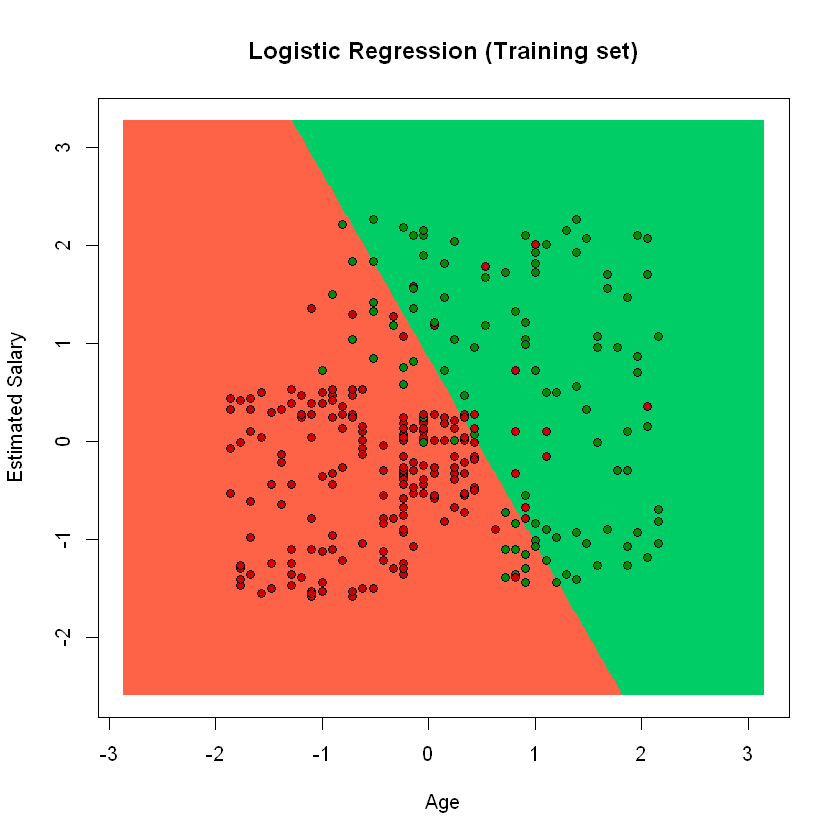

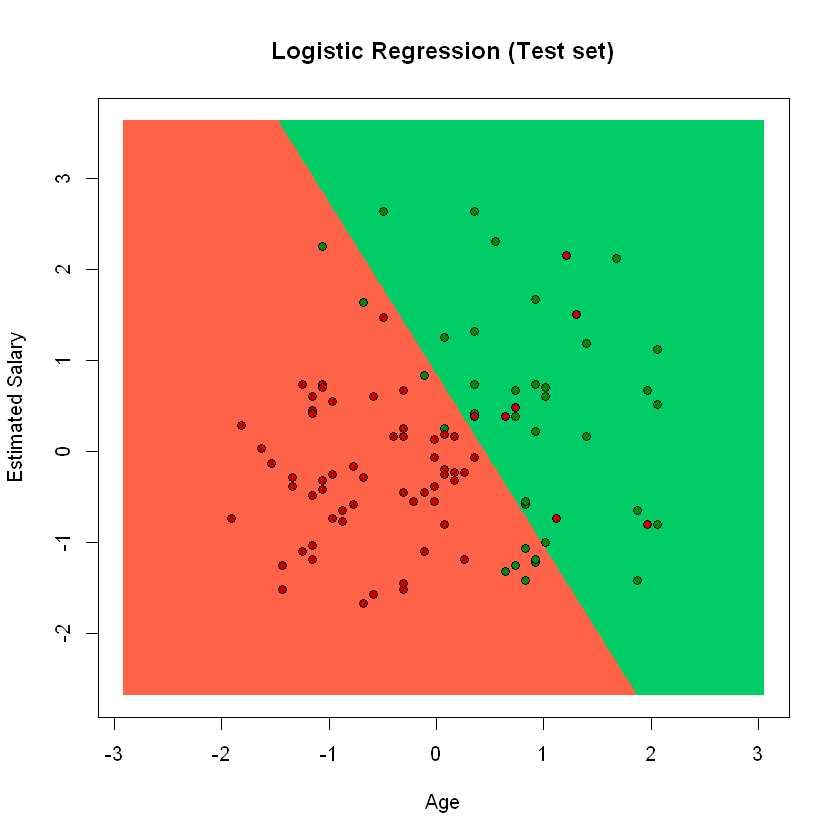

In [28]:
# Visualisation des résultats du Training set 
# Install.packages("ElemStatLearn")
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualisation des résultats du test set 
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

La frontière de décision d'une régression logistique est linéaire..

## 2.2 K - plus proches voisins
L'algorithme des k plus proches voisins K-NN a pour but de regrouper un ensemble d'individus en sous-ensembles plus ou moins homogènes sur les caractéristiques de leurs k voisins les plus proches et en concordance avec les catégories de la variable réponse.
Voici la commande pour implémenter du K-NN en R: 

In [29]:
library(class)
y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)
summary(y_pred)
# Matrice de confusion
cm = table(y_pred, test_set[, 3], dnn=c("Prediction","Observation"))
cm

0  1 
65 35

          Observation
Prediction  0  1
         0 59  6
         1  5 30

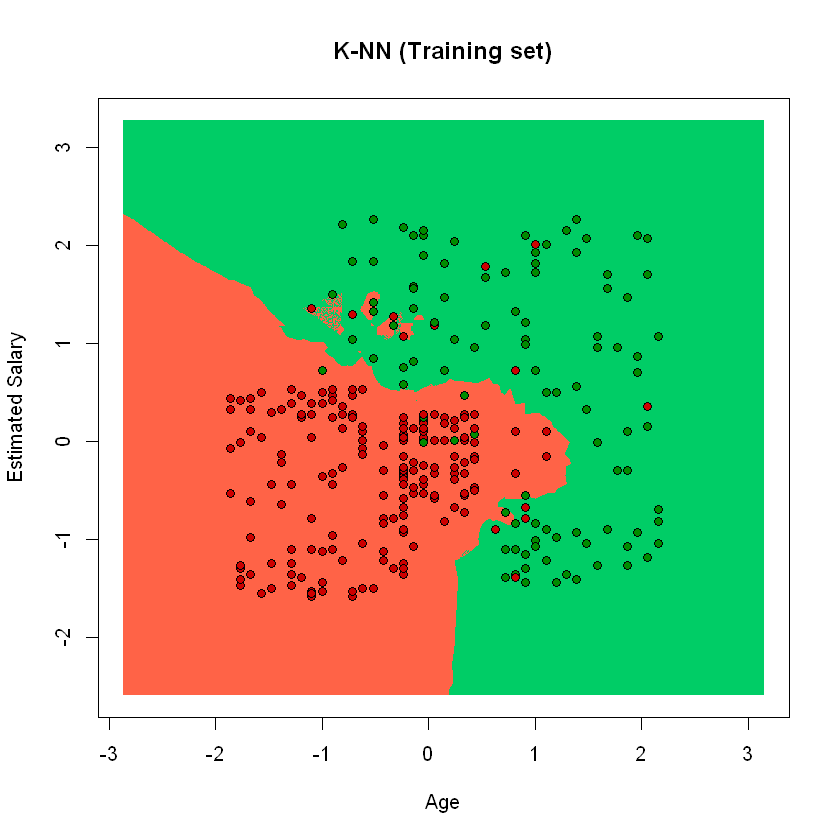

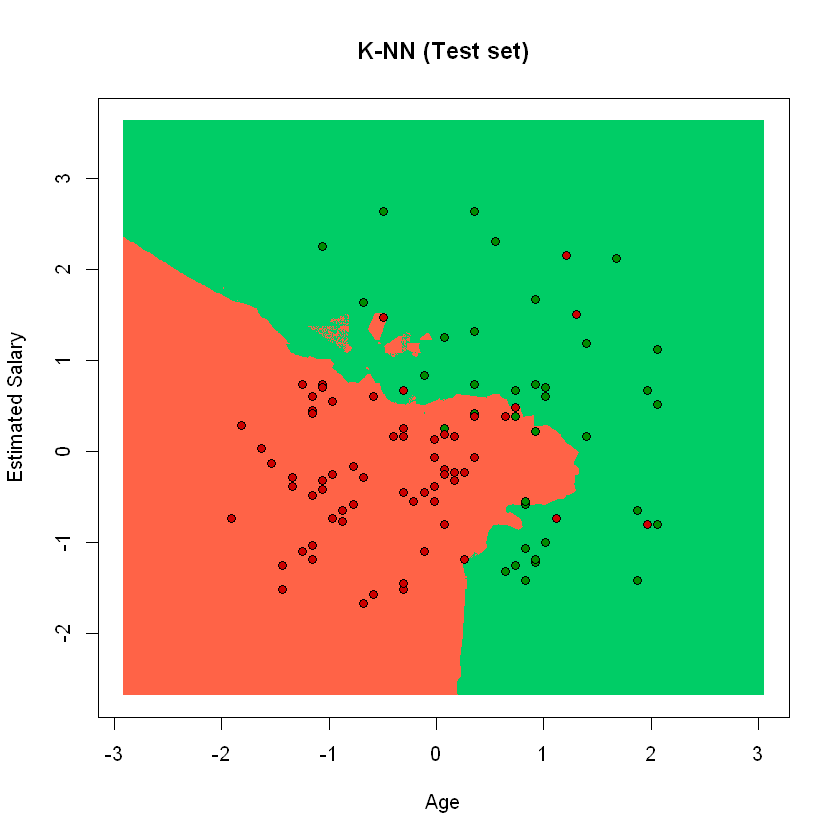

In [30]:
# Visualisation des résultats du Training set 
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualisation des résultats du Training set 
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

On voit bien ici que la frontière de décision n'est pas linéaire ce qui nous donne plus de flexibilité.

## 2.3 Support Vector Machine
Le SVM (en français vecteur de support machine) est un algorithme qui tente de trouver des frontières de décisions pour séparer un échantillon en groupes. Ces frontières peuvent avoir une forme linéaire, polynômiale ou radiale. L'objectif de l'algorithme est de maximiser la marge entre les frontières tant que peut se faire.
Voici comment ajuster un SVM avec R:

In [31]:
# install.packages('e1071')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')
summary(classifier)


Call:
svm(formula = Purchased ~ ., data = training_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  116

 ( 58 58 )


Number of Classes:  2 

Levels: 
 0 1




In [32]:
# Prédictions
y_pred = predict(classifier, newdata = test_set[-3])

# Matrice de confusion
cm = table(y_pred, test_set[, 3], dnn=c("Prediction","Observation"))
cm

          Observation
Prediction  0  1
         0 57 13
         1  7 23

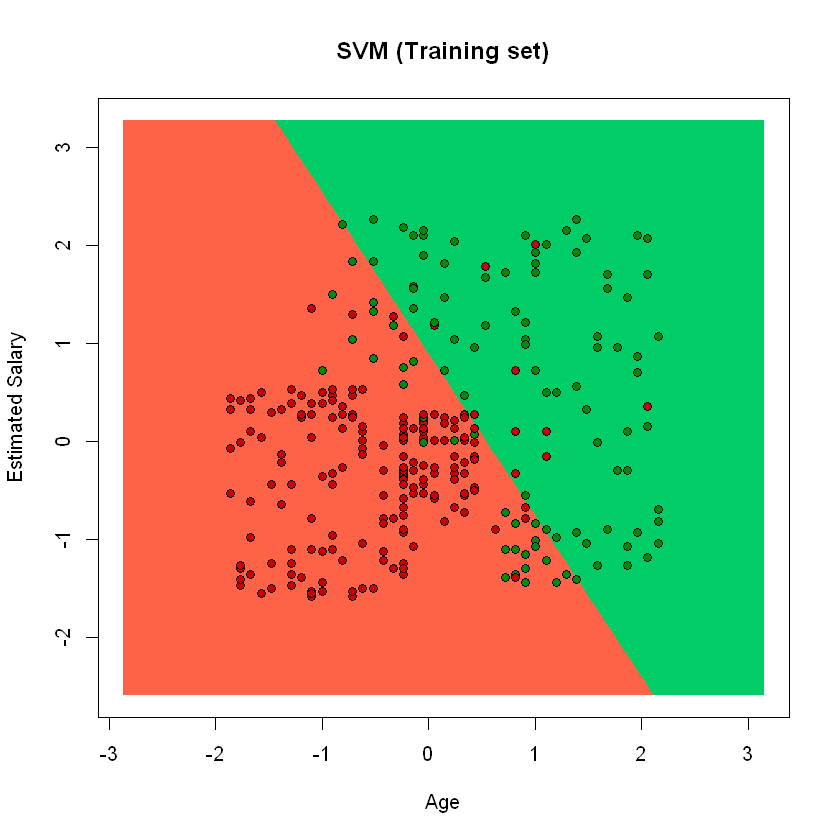

In [ ]:
# Visualisation des résultats du Training set 
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualisation des résultats du Test set 
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## 2.4 Arbre binaire de classification
Un Arbre binaire de classification utilise une succession de règles de décision ou splits binaires pour séparer les individus de l'échantillon et du fait même les assigner à l'une des catégories de la variable réponse. Les splits sont réalisés selon les modalités de la variable indépendante et on commence l'algorithme avec la variable dont le split occasionne la plus grande baisse de l'indice d'impureté gini; un indice qui renseigne sur l'homogénéité des classe formées.
Pour faire un arbre de décision dans R on peut utiliser le template suivant:

In [ ]:
library(rpart)
classifier = rpart(formula = Purchased ~ .,
                   data = training_set)

In [ ]:
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')

# Matrice de confusion
cm = table(y_pred, test_set[, 3], dnn=c("Prediction","Observation"))
cm

In [ ]:
# Visualisation des résultats du Training set 
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Classification (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualisation des résultats du Test set 
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3], main = 'Decision Tree Classification (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))


In [ ]:
# visualisation de l'arbre
library(rpart.plot)
prp(classifier, extra=1, roundint=FALSE)

## 2.5 Exercice 2
Cet exercice a pour but d'amélorer la performence de l'algorithme SVM ajusté plus haut
1. Reprenez la classification mais cette fois-ci avec un kernel radial puis polynômial de degrés 2 et 3
2. Comparez les matrices de confusion et choisissez l'algorithme qui performe le mieux
5. Commentez

## Références
- Introduction à R et au tidyverse, Partie 8 visualisation avec ggplot 2, Julien Barnier 2019-10-21
- Machine learning A-Z: hands-on python & R in data science, Udemy course